# Aula 10

## Mínimos Quadrados utilizando multiplicação matricial

Suponha um experimento de queda livre onde obtemos a variação de altura em função do tempo ($t_i$, $y_i$). Vamos tentar ajustar uma equação de segundo grau e obter os melhores parâmetros. Com isso, temos uma sequência de equações lineares:

\begin{equation}
\begin{matrix}
y_1 = a + bt_1 + at_1^2\\
y_2 = a + bt_2 + at_2^2\\
\cdot\cdot\cdot\\
y_n = a + bt_n + at_n^2\\
\end{matrix}
\label{eq:calor_especifico} \tag{1}
\end{equation}

Podemos transformar estas equações em uma multiplicação matricial:

\begin{equation}
\begin{bmatrix}
y_1\\ y_2 \\ \cdot\cdot\cdot \\ y_n
\end{bmatrix} = 
\begin{bmatrix}
1 & t_1 & t_1^2\\ 1 & t_2 & t_2^2 \\ \cdot\cdot\cdot \\ 1 & t_n & t_n^2
\end{bmatrix} 
\begin{bmatrix}
a\\ b \\ c
\end{bmatrix} 
\end{equation}

Simplificamos a equação fazendo:

\begin{equation}
Y = \begin{bmatrix}
y_1\\ y_2 \\ \cdot\cdot\cdot \\ y_n
\end{bmatrix}
\end{equation}

\begin{equation}
M = \begin{bmatrix}
1 & t_1 & t_1^2\\ 1 & t_2 & t_2^2 \\ \cdot\cdot\cdot \\ 1 & t_n & t_n^2
\end{bmatrix} 
\end{equation}

\begin{equation}
X = \begin{bmatrix}
a\\ b \\ c
\end{bmatrix} 
\end{equation}

Logo: $Y = MX$

Como a matriz $M$ não é quadrada não podemos invertê-la para obter X. Para resolver este problema, multiplicamos esta equação pela transposta de $M$. Com isso, a multiplicação de $M$ por sua transposta é quadrada. Se a matriz resultante for invertível, podemos utilizá-la para obter o valor da matrix $X$:

$$Y = MX$$
$$M^TY = (M^TM)X$$
$$(M^TM)^{-1}M^TY = X$$

## Ler arquivo

Vamos primeiramente ler o arquivo de dados do experimento simulado "dados1.txt". Este arquivo possui na primeira coluna as variações de altura dos experimentos. Nas colunas restantes temos as diversas tentativas, sendo cada linha os 10 experimentos para cada altura.

In [1]:
import numpy as np

In [2]:
# lemos apenas a primeira coluna para a variável de alturas
y = np.loadtxt('dados1.txt', usecols=[0])

In [3]:
y

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [4]:
# Lemos todas as colunas restantes para a variável de tempos
tempos = np.loadtxt('dados1.txt', usecols=[1,2,3,4,5,6,7,8,9,10])

In [5]:
# Esta variável de tempos é uma matriz de 10 linhas por 10 colunas
print(tempos)

[[0.8428 1.1185 0.8814 0.9262 0.6118 0.7292 0.9211 1.0313 1.595  1.0057]
 [1.6922 1.4831 1.5734 1.3259 2.0035 1.8646 1.9466 1.3935 1.7367 1.6644]
 [2.3721 1.9264 2.1468 2.0722 1.7667 2.0059 2.3233 2.6035 1.9932 2.0211]
 [2.4722 2.8972 2.7822 2.9445 2.7215 2.8927 2.6235 2.3068 2.4996 2.7418]
 [3.4313 2.8026 2.9582 2.9269 3.4173 3.0331 2.7519 3.0659 2.7578 2.9828]
 [3.1708 3.1326 3.4476 2.9496 3.1892 3.0524 3.1767 3.2052 3.2295 3.3993]
 [3.5423 3.2576 3.9317 3.822  4.0446 3.7761 3.7495 3.2949 3.9469 3.6903]
 [4.1976 4.0841 3.7502 3.8618 3.6485 4.3098 3.6746 3.711  3.7216 3.9358]
 [4.3948 4.1723 4.392  4.2884 3.8712 4.1123 4.002  3.9301 4.5328 4.3038]
 [4.2845 4.6927 4.3984 4.7557 4.1916 4.2151 4.4894 4.7436 4.5183 4.4202]]


In [6]:
# Obtemos os valores médios do tempo para cada altura fazendo
t_mean = tempos.mean(axis=1)

In [7]:
t_mean

array([0.9663 , 1.66839, 2.12312, 2.6882 , 3.01278, 3.19529, 3.70559,
       3.8895 , 4.19997, 4.47095])

In [8]:
# Para obter o desvio padrão, utilizamos o método 'std' do numpy.
# Não podemos esquecer de definir o 'delta degrees of freedom'
# que diz por qual valor deve-se diminuir o valor de N na equação do desvio padrão.
# N - ddof
t_std = tempos.std(axis=1, ddof=1)

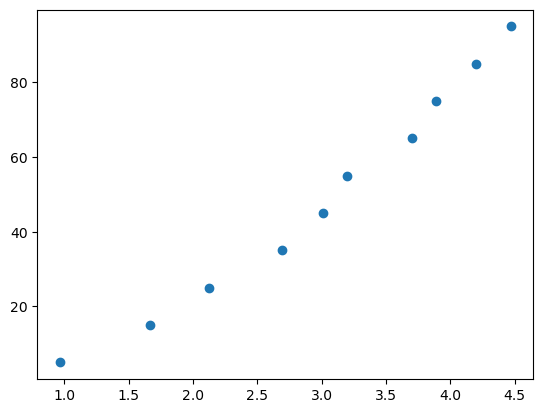

In [9]:
# Visualizamos os dados
import matplotlib.pyplot as plt
plt.plot(t_mean, y, 'o')

<ErrorbarContainer object of 3 artists>

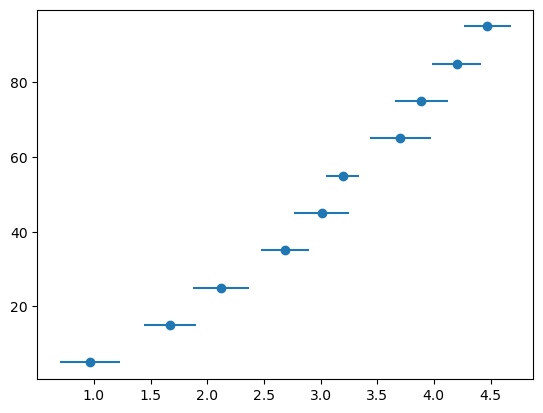

In [10]:
# Agora visualizamos utilizando o desvio padrão como a barra de erro.
plt.errorbar(t_mean, y, xerr=t_std, fmt='o')

## Mínimos Quadrados

In [11]:
# Definimos uma função para gerar a matriz identidade
def gera_identidade(n):
    identidade = np.zeros((n, n))
    for i in range(n):
        identidade[i, i] = 1
    return identidade

In [12]:
# Definimos uma função que inverte uma matriz
# Note que esta função ainda não é completa.
# Falta ainda a troca de linhas quando necessário.
def inverte_matriz(matriz):
    """ Inverte matriz quadrada
    
    Parameters
    ----------
    matrix: numpy.array
        Matriz de tamanho nxn
    """
    matriz = matriz.copy()
    x, y = matriz.shape
    if x != y:
        raise ValueError('Matriz não é quadrada')
    inversa = gera_identidade(x)
    for i in range(x):
        pivo = matriz[i, i]
        matriz[i] = matriz[i] / pivo
        inversa[i] = inversa[i] / pivo
        for j in range(i+1,x):
            val = matriz[j,i]
            matriz[j] = matriz[j] - val*matriz[i]
            inversa[j] = inversa[j] - val*inversa[i]
    
    for i in range(x):
        for j in range(i+1, x):
            val = matriz[i,j]
            matriz[i] = matriz[i] - val*matriz[j]
            inversa[i] = inversa[i] - val*inversa[j]
            
    return matriz, inversa

In [13]:
# Definimos a função para a multiplicação matricial
def matmul(matriz1, matriz2):
    x1, y1 = matriz1.shape
    x2, y2 = matriz2.shape
    if y1 != x2:
        raise ValueError('Matrizes não possuem dimensões compatíveis')
    resultado = np.zeros((x1, y2))
    for i in range(x1):
        for j in range(y2):
            resultado[i, j] = np.sum(matriz1[i]*matriz2[:, j])
    return resultado

Agora vamos montar a matriz $M$ que contem a primeira coluna como 1, a segunda coluna com os valores do tempo médio e a última coluna com os valores do tempo médio ao quadrado.

In [14]:
matriz = np.ones((10, 3))
matriz[:, 1] = t_mean
matriz[:, 2] = t_mean**2

In [15]:
matriz

array([[ 1.        ,  0.9663    ,  0.93373569],
       [ 1.        ,  1.66839   ,  2.78352519],
       [ 1.        ,  2.12312   ,  4.50763853],
       [ 1.        ,  2.6882    ,  7.22641924],
       [ 1.        ,  3.01278   ,  9.07684333],
       [ 1.        ,  3.19529   , 10.20987818],
       [ 1.        ,  3.70559   , 13.73139725],
       [ 1.        ,  3.8895    , 15.12821025],
       [ 1.        ,  4.19997   , 17.639748  ],
       [ 1.        ,  4.47095   , 19.9893939 ]])

In [16]:
# A transposta de uma matriz pode ser obtida utilizando o atributo 'T' como mostrado abaixo.
matrizT = matriz.T

In [17]:
# Realizamos a multiplicação matricial da matriz transposta com a própria matriz
mm = matmul(matrizT, matriz)

In [18]:
mm

array([[  10.        ,   29.92009   ,  101.22678957],
       [  29.92009   ,  101.22678957,  367.694741  ],
       [ 101.22678957,  367.694741  , 1395.94110624]])

In [19]:
# Invertemos o resultado desta matriz
mmi = inverte_matriz(mm)[1]

In [20]:
mmi

array([[ 4.24975678, -3.16345995,  0.52509261],
       [-3.16345995,  2.58340816, -0.45107827],
       [ 0.52509261, -0.45107827,  0.08145449]])

Por fim, para obter o valor de $X$ utilizamos a equação apresentada no começo:

$$X = (M^TM)^{-1}M^TY$$

In [21]:
mmit = matmul(mmi,matrizT)

In [22]:
mmit

array([[ 1.68320314e+00,  4.33480328e-01, -9.97206497e-02,
        -4.59716956e-01, -5.14868782e-01, -4.97283633e-01,
        -2.62473627e-01, -1.10809369e-01,  2.25821121e-01,
         6.02368431e-01],
       [-1.08830053e+00, -1.08915341e-01,  2.88127787e-01,
         5.21577173e-01,  5.25413697e-01,  4.85824118e-01,
         2.15656574e-01,  6.06991766e-02, -2.70130196e-01,
        -6.29952461e-01],
       [ 1.65272636e-01, -7.51248372e-04, -6.54332994e-02,
        -9.88717161e-02, -9.45573531e-02, -8.45928734e-02,
        -2.79345799e-02,  2.88430426e-03,  6.74140570e-02,
         1.36570073e-01]])

Porém, a multiplicação matricial por Y não pode ser realizada porque o numpy não vê a variável 'y' como uma matriz coluna, mas como uma lista. Precisamos colocar 'y' como uma matriz coluna.

In [23]:
y2 = np.array(y, ndmin=2).T

In [24]:
y2

array([[ 5.],
       [15.],
       [25.],
       [35.],
       [45.],
       [55.],
       [65.],
       [75.],
       [85.],
       [95.]])

In [25]:
x = matmul(mmit, y2)

In [26]:
x

array([[-3.13627635],
       [ 4.51067096],
       [ 3.91598987]])

In [27]:
# Para retirar a matriz X de uma matriz coluna e colocar como lista.
x = x.flatten()
print(x)

[-3.13627635  4.51067096  3.91598987]


Para finallizar, vamos vizualizar os dados e a curva de melhor ajuste.

In [28]:
# Geramos uma lista de tempos para utilizar no polinômio ajustado.
t = np.linspace(0, 5, 100)
ny = x[0] + x[1]*t + x[2]*(t**2)

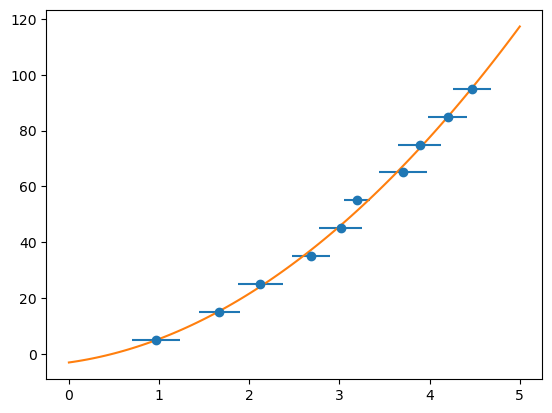

In [29]:
plt.errorbar(t_mean, y, xerr=t_std, fmt='o') # dados com barra de erro
plt.plot(t, ny) # curva de melhor ajuste

In [30]:
# Resultado do ajuste '\n' é comando para quebra de linha.
print('x0 = {} m\nv0 = {} m/s\na = {} m/s^2'.format(x[0], x[1], x[2]*2))

x0 = -3.136276351146279 m
v0 = 4.510670964525623 m/s
a = 7.831979735293199 m/s^2
